In [1162]:
import pandas as pd
import requests as r
from bs4 import BeautifulSoup as bs
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Task: Columns -> Energy & Petrol Consumption, Storage

In [1163]:
all_df = pd.read_csv("finished_df.csv")
all_df.head(3)

,manufacturer,year,model,total_range_in_mls,electric_consumption,electric_storage,analogue_consumption,analogue_storage,emission_value,min_price,max_price,car_type
0,Chevrolet,2023,Bolt EV,259,120,7.5,0,0.0,0,26500.0,29700.0,Electricity
1,Chevrolet,2022,Bolt EV,259,120,7.5,0,0.0,0,31000.0,34200.0,Electricity
2,Chevrolet,2019,Bolt EV,238,119,9.3,0,0.0,0,36620.0,41020.0,Electricity


In [1164]:
all_df

,manufacturer,year,model,total_range_in_mls,electric_consumption,electric_storage,analogue_consumption,analogue_storage,emission_value,min_price,max_price,car_type
0,Chevrolet,2023,Bolt EV,259,120,7.5,0,0.0,0,26500.0,29700.0,Electricity
1,Chevrolet,2022,Bolt EV,259,120,7.5,0,0.0,0,31000.0,34200.0,Electricity
2,Chevrolet,2019,Bolt EV,238,119,9.3,0,0.0,0,36620.0,41020.0,Electricity
3,Chevrolet,2021,Bolt EV,259,118,10.0,0,0.0,0,36500.0,41700.0,Electricity
4,Chevrolet,2020,Bolt EV,259,118,10.0,0,0.0,0,36620.0,41020.0,Electricity
...,...,...,...,...,...,...,...,...,...,...,...,...
1286,Nissan,2022,Armada 4WD,416,0,0.0,15,26.0,631,NaN,NaN,Premium Gasoline
1287,Nissan,2021,Armada 4WD,416,0,0.0,15,26.0,631,59140.0,72135.0,Premium Gasoline
1288,Nissan,2021,Armada 4WD,416,0,0.0,15,26.0,654,NaN,NaN,Premium Gasoline
1289,Nissan,2020,Armada 4WD,390,0,0.0,15,26.0,741,NaN,NaN,Regular Gasoline


In [1165]:
all_df["avg_price"] = all_df[["min_price","max_price"]].mean(axis=1)

In [1166]:
all_df["avg_price"]

0        28100.0
1        32600.0
2        38820.0
3        39100.0
4        38820.0
          ...   
1286         NaN
1287     65637.5
1288         NaN
1289         NaN
1290    107350.0
Name: avg_price, Length: 1291, dtype: float64

In [1167]:
all_df.groupby(["car_type"])["total_range_in_mls"].mean().sort_values(ascending=False)

car_type
Diesel              471.050000
Regular Gasoline    401.234818
Premium Gasoline    399.697674
Electricity         365.436620
Name: total_range_in_mls, dtype: float64

In [1168]:
all_df.groupby(["car_type"])["max_price"].mean().sort_values(ascending=False)

car_type
Premium Gasoline    71720.068493
Diesel              58125.288462
Electricity         47326.040000
Regular Gasoline    46509.519950
Name: max_price, dtype: float64

In [1169]:
all_df.groupby(["car_type"])["emission_value"].mean().sort_values(ascending=False)

car_type
Premium Gasoline    505.441860
Diesel              435.383333
Regular Gasoline    422.817814
Electricity          10.338028
Name: emission_value, dtype: float64

In [1170]:
range_comparison = all_df.pivot_table(values="total_range_in_mls", index="manufacturer", columns="car_type",
                                         aggfunc="mean")
range_comparison

car_type,Diesel,Electricity,Premium Gasoline,Regular Gasoline
manufacturer,,,,
Chevrolet,490.42,317.090909,399.763636,410.749263
Ford,374.20,374.300000,396.490566,393.328605
Nissan,NaN,NaN,417.777778,401.761062


In [1171]:
all_df["car_type"].value_counts()

car_type
Regular Gasoline    988
Premium Gasoline    172
Electricity          71
Diesel               60
Name: count, dtype: int64

In [1172]:
sns.set_style("darkgrid")
sns.color_palette("tab10", as_cmap=True)
sns.set_palette("tab10")

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='car_type', ylabel='total_range_in_mls'>

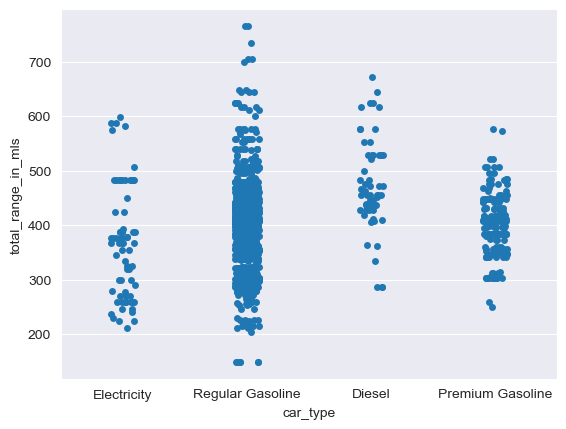

In [1173]:
sns.stripplot(data=all_df, x="car_type", y="total_range_in_mls",)

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='manufacturer', ylabel='total_range_in_mls'>

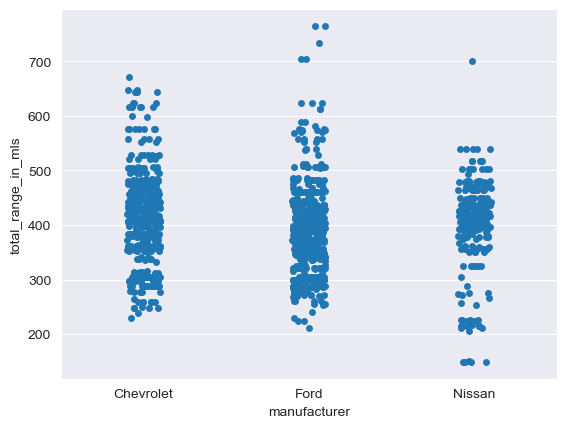

In [1174]:
sns.stripplot(data=all_df, x="manufacturer", y="total_range_in_mls")

<Axes: xlabel='max_price', ylabel='total_range_in_mls'>

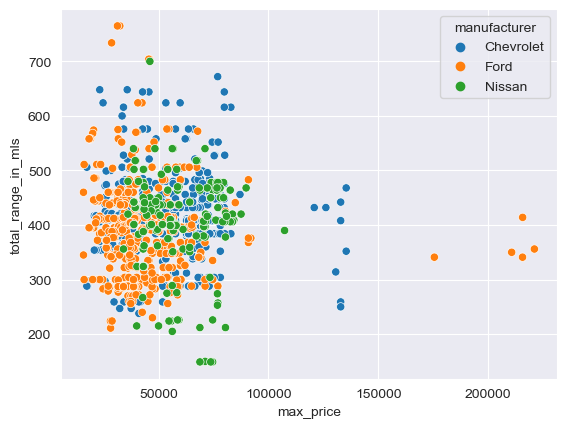

In [1175]:
sns.scatterplot(data=all_df, x="max_price", y="total_range_in_mls", hue="manufacturer")

In [1176]:
price_comparison = all_df.pivot_table(values="avg_price", index="car_type", columns="manufacturer",
                                     aggfunc="mean")
price_comparison

manufacturer,Chevrolet,Ford,Nissan
car_type,,,
Diesel,49503.858696,46000.000000,NaN
Electricity,36861.944444,46127.000000,NaN
Premium Gasoline,58004.441489,60888.020833,68831.875000
Regular Gasoline,41441.922414,34655.899433,51749.292453


<Axes: xlabel='car_type', ylabel='count'>

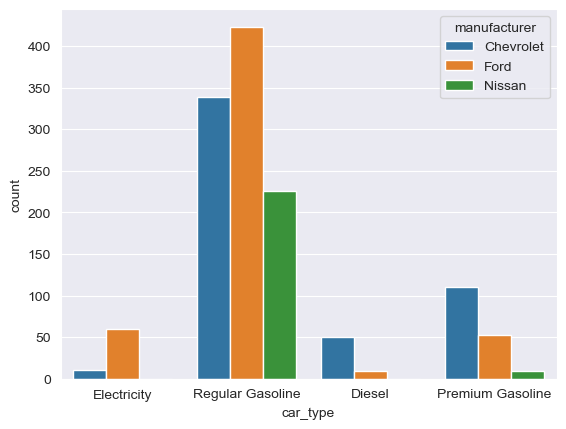

In [1177]:
sns.countplot(all_df, x="car_type", hue="manufacturer")

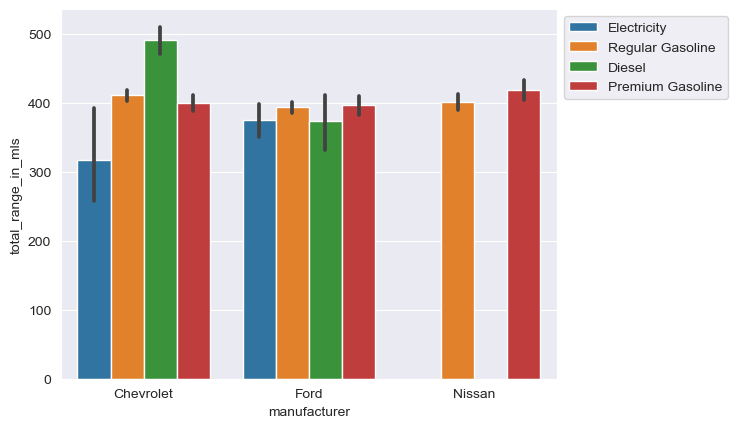

In [1178]:
sns.barplot(all_df, x="manufacturer", y="total_range_in_mls", hue="car_type")
plt.legend(bbox_to_anchor= (1,1))

<Axes: xlabel='avg_price', ylabel='total_range_in_mls'>

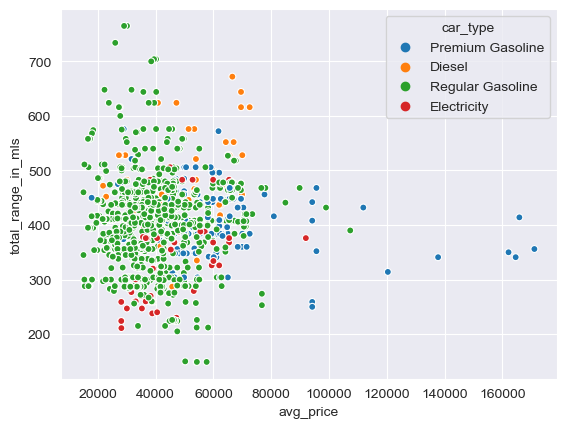

In [1179]:
order = ["Premium Gasoline","Diesel","Regular Gasoline","Electricity"]
sns.scatterplot(data=all_df, x="avg_price", y="total_range_in_mls", hue="car_type", hue_order=order, marker=".", s=100)

In [1180]:
all_df.groupby(["manufacturer"])["car_type"].value_counts()

manufacturer  car_type        
Chevrolet     Regular Gasoline    339
              Premium Gasoline    110
              Diesel               50
              Electricity          11
Ford          Regular Gasoline    423
              Electricity          60
              Premium Gasoline     53
              Diesel               10
Nissan        Regular Gasoline    226
              Premium Gasoline      9
Name: count, dtype: int64

In [1181]:
all_df["manu_backup"] = all_df["manufacturer"]
all_df["type_backup"] = all_df["car_type"]
all_df_copy = all_df.set_index(["manufacturer", "car_type", "model"]).sort_values(by=["car_type",
                                                                                      "total_range_in_mls"],ascending=False)[["total_range_in_mls", 
                                                                                                                              "avg_price", 
                                                                                                                              "manu_backup",
                                                                                                                              "type_backup",
                                                                                                                             "electric_consumption",
                                                                                                                             "analogue_consumption",
                                                                                                                             "year"]]


In [1182]:

sorted_dict = {}
sorted = pd.DataFrame(sorted_dict).T

for m in all_df["manufacturer"].unique():
    try:
        regular_gasoline = all_df_copy.loc[m].loc["Regular Gasoline"].head(3).reset_index()#
        electricity = all_df_copy.loc[m].loc["Electricity"].head(3).reset_index()
    except Exception as e:
        print(e)
    finally:
        sorted = pd.concat([sorted, regular_gasoline, electricity], axis=0, ignore_index=True)
        
        


'Electricity'


In [1183]:
sorted.drop([15,16,17], axis=0, inplace=True)

In [1184]:
sorted.set_index(["manu_backup","type_backup"],drop=True,inplace=True)

In [1185]:
sorted.iloc[6]

model                   Fusion FWD
total_range_in_mls             765
avg_price                  30080.0
electric_consumption             0
analogue_consumption            27
year                          2019
Name: (Ford, Regular Gasoline), dtype: object

In [1186]:
sorted

model  \
manu_backup type_backup                                       
Chevrolet   Regular Gasoline                    Equinox AWD   
            Regular Gasoline                       Trax FWD   
            Regular Gasoline                     Blazer AWD   
            Electricity                        Silverado EV   
            Electricity                        Silverado EV   
            Electricity                                Volt   
Ford        Regular Gasoline                     Fusion FWD   
            Regular Gasoline               Bronco Sport 4WD   
            Regular Gasoline                   EcoSport AWD   
            Electricity                   Mustang Mach-E GT   
            Electricity       Mustang Mach-E GT Performance   
            Electricity       Mustang Mach-E GT Performance   
Nissan      Regular Gasoline                     Murano AWD   
            Regular Gasoline   Leaf (40 kW-hr battery pack)   
            Regular Gasoline                           LEAF   

                              total_range_in_mls  avg_price  \
manu_backup type_backup                                       
Chevrolet   Regular Gasoline                 648    31650.0   
            Regular Gasoline                 648    22300.0   
            Regular Gasoline                 644    40200.0   
            Electricity                      598        NaN   
            Electricity                      450        NaN   
            Electricity                      393    35820.0   
Ford        Regular Gasoline                 765    30080.0   
            Regular Gasoline                 765    29075.0   
            Regular Gasoline                 734    26015.0   
            Electricity                      588        NaN   
            Electricity                      588        NaN   
            Electricity                      582        NaN   
Nissan      Regular Gasoline                 700    38467.5   
            Regular Gasoline                 540    55117.5   
            Regular Gasoline                 540    36317.5   

                              electric_consumption  analogue_consumption  year  
manu_backup type_backup                                                         
Chevrolet   Regular Gasoline                     0                    27  2019  
            Regular Gasoline                     0                    27  2022  
            Regular Gasoline                     0                    23  2020  
            Electricity                         63                     0  2024  
            Electricity                         67                     0  2024  
            Electricity                        106                   106  2019  
Ford        Regular Gasoline                     0                    27  2019  
            Regular Gasoline                     0                    26  2024  
            Regular Gasoline                     0                    25  2021  
            Electricity                         84                     0  2021  
            Electricity                         82                     0  2023  
            Electricity                         82                     0  2022  
Nissan      Regular Gasoline                     0                    23  2020  
            Regular Gasoline                   112                     0  2019  
            Regular Gasoline                   111                     0  2024

In [1187]:
prices = pd.read_csv("prices_df.csv")

In [1188]:
prices

,Year,Jan_gasoline,Feb_gasoline,Mar_gasoline,Apr_gasoline,May_gasoline,Jun_gasoline,Jul_gasoline,Aug_gasoline,Sep_gasoline,...,Mar_energy,Apr_energy,May_energy,Jun_energy,Jul_energy,Aug_energy,Sep_energy,Oct_energy,Nov_energy,Dec_energy
0,2018,2.596,2.632,2.631,2.795,2.9630,2.970,2.930,2.9190,2.9300,...,1.35,1.34,1.360,1.39,1.390,1.390,1.38,1.360,1.340,1.35
1,2019,2.352,2.412,2.620,2.894,2.9630,2.814,2.836,2.7160,2.6940,...,1.35,1.35,1.360,1.39,1.400,1.390,1.39,1.360,1.330,1.33
2,2020,2.631,2.530,2.334,1.946,1.9460,2.141,2.243,2.2450,2.2600,...,1.34,1.33,1.340,1.37,1.370,1.370,1.37,1.350,1.360,1.36
3,2021,2.391,2.559,2.856,2.907,3.0410,3.245,3.326,3.3510,3.3610,...,1.38,1.39,1.400,1.42,1.430,1.440,1.44,1.420,1.420,1.42
4,2022,3.500,3.675,4.401,4.369,4.6950,5.149,4.768,4.2050,3.9900,...,1.50,1.51,1.540,1.60,1.640,1.670,1.67,1.660,1.630,1.65
5,2023,3.555,3.622,3.660,3.839,3.7940,3.821,3.842,4.0640,4.1070,...,1.66,1.65,1.650,1.70,1.690,1.700,1.71,1.690,1.680,1.69
6,2024,3.353,3.486,3.707,4.104,4.2445,4.485,4.305,4.1345,4.0485,...,1.74,1.58,1.595,1.65,1.665,1.685,1.69,1.675,1.655,1.67


In [1189]:
prices_melt = pd.melt(prices, id_vars=["Year"], value_vars=None, var_name='months', value_name='price')

In [1190]:
prices_melt_pivot = prices_melt.pivot(index="Year", columns="months", values="price")

In [1191]:
prices_melt["type"] = prices_melt["months"].map(lambda x: x.split("_")[1])
prices_melt["months"] = prices_melt["months"].map(lambda x: x.split("_")[0])
prices_melt.set_index("Year", drop=True, inplace=True)

In [1192]:
prices_melt.head(2)

,months,price,type
Year,,,
2018,Jan,2.596,gasoline
2019,Jan,2.352,gasoline


In [1193]:
prices_melt_pivot = prices_melt_pivot[["Jan_gasoline","Feb_gasoline","Mar_gasoline",
                                      "Apr_gasoline","May_gasoline","Jun_gasoline",
                                      "Jul_gasoline","Aug_gasoline","Sep_gasoline",
                                      "Oct_gasoline","Nov_gasoline","Dec_gasoline",
                                       "Jan_energy","Feb_energy","Mar_energy",
                                      "Apr_energy","May_energy","Jun_energy",
                                      "Jul_energy","Aug_energy","Sep_energy",
                                      "Oct_energy","Nov_energy","Dec_energy"]]
prices_melt_pivot

months,Jan_gasoline,Feb_gasoline,Mar_gasoline,Apr_gasoline,May_gasoline,Jun_gasoline,Jul_gasoline,Aug_gasoline,Sep_gasoline,Oct_gasoline,...,Mar_energy,Apr_energy,May_energy,Jun_energy,Jul_energy,Aug_energy,Sep_energy,Oct_energy,Nov_energy,Dec_energy
Year,,,,,,,,,,,,,,,,,,,,,
2018,2.596,2.632,2.631,2.795,2.9630,2.970,2.930,2.9190,2.9300,2.945,...,1.35,1.34,1.360,1.39,1.390,1.390,1.38,1.360,1.340,1.35
2019,2.352,2.412,2.620,2.894,2.9630,2.814,2.836,2.7160,2.6940,2.741,...,1.35,1.35,1.360,1.39,1.400,1.390,1.39,1.360,1.330,1.33
2020,2.631,2.530,2.334,1.946,1.9460,2.141,2.243,2.2450,2.2600,2.228,...,1.34,1.33,1.340,1.37,1.370,1.370,1.37,1.350,1.360,1.36
2021,2.391,2.559,2.856,2.907,3.0410,3.245,3.326,3.3510,3.3610,3.477,...,1.38,1.39,1.400,1.42,1.430,1.440,1.44,1.420,1.420,1.42
2022,3.500,3.675,4.401,4.369,4.6950,5.149,4.768,4.2050,3.9900,4.130,...,1.50,1.51,1.540,1.60,1.640,1.670,1.67,1.660,1.630,1.65
2023,3.555,3.622,3.660,3.839,3.7940,3.821,3.842,4.0640,4.1070,3.910,...,1.66,1.65,1.650,1.70,1.690,1.700,1.71,1.690,1.680,1.69
2024,3.353,3.486,3.707,4.104,4.2445,4.485,4.305,4.1345,4.0485,4.020,...,1.74,1.58,1.595,1.65,1.665,1.685,1.69,1.675,1.655,1.67


In [1194]:
prices_melt_pivot_test = prices_melt_pivot.map(lambda x: x/sorted.iloc[0]["analogue_consumption"])
prices_melt_pivot_test

months,Jan_gasoline,Feb_gasoline,Mar_gasoline,Apr_gasoline,May_gasoline,Jun_gasoline,Jul_gasoline,Aug_gasoline,Sep_gasoline,Oct_gasoline,...,Mar_energy,Apr_energy,May_energy,Jun_energy,Jul_energy,Aug_energy,Sep_energy,Oct_energy,Nov_energy,Dec_energy
Year,,,,,,,,,,,,,,,,,,,,,
2018,0.096148,0.097481,0.097444,0.103519,0.109741,0.110000,0.108519,0.108111,0.108519,0.109074,...,0.050000,0.049630,0.050370,0.051481,0.051481,0.051481,0.051111,0.050370,0.049630,0.050000
2019,0.087111,0.089333,0.097037,0.107185,0.109741,0.104222,0.105037,0.100593,0.099778,0.101519,...,0.050000,0.050000,0.050370,0.051481,0.051852,0.051481,0.051481,0.050370,0.049259,0.049259
2020,0.097444,0.093704,0.086444,0.072074,0.072074,0.079296,0.083074,0.083148,0.083704,0.082519,...,0.049630,0.049259,0.049630,0.050741,0.050741,0.050741,0.050741,0.050000,0.050370,0.050370
2021,0.088556,0.094778,0.105778,0.107667,0.112630,0.120185,0.123185,0.124111,0.124481,0.128778,...,0.051111,0.051481,0.051852,0.052593,0.052963,0.053333,0.053333,0.052593,0.052593,0.052593
2022,0.129630,0.136111,0.163000,0.161815,0.173889,0.190704,0.176593,0.155741,0.147778,0.152963,...,0.055556,0.055926,0.057037,0.059259,0.060741,0.061852,0.061852,0.061481,0.060370,0.061111
2023,0.131667,0.134148,0.135556,0.142185,0.140519,0.141519,0.142296,0.150519,0.152111,0.144815,...,0.061481,0.061111,0.061111,0.062963,0.062593,0.062963,0.063333,0.062593,0.062222,0.062593
2024,0.124185,0.129111,0.137296,0.152000,0.157204,0.166111,0.159444,0.153130,0.149944,0.148889,...,0.064444,0.058519,0.059074,0.061111,0.061667,0.062407,0.062593,0.062037,0.061296,0.061852


In [1195]:
prices_melt_test = prices_melt.copy()
prices_melt_test["price"] = prices_melt["price"].map(lambda x: x/sorted.iloc[7]["analogue_consumption"])
prices_melt_test

,months,price,type
Year,,,
2018,Jan,0.099846,gasoline
2019,Jan,0.090462,gasoline
2020,Jan,0.101192,gasoline
2021,Jan,0.091962,gasoline
2022,Jan,0.134615,gasoline
...,...,...,...
2020,Dec,0.052308,energy
2021,Dec,0.054615,energy
2022,Dec,0.063462,energy


In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=prices_melt_test.query("type == 'gasoline'"), x="months", y="price", hue="Year")
plt.title("Chevrolet - Equinox AWD - 2019")

In [1248]:
new_df = all_df.groupby(["manufacturer","year"])["emission_value"].mean().to_frame()
addition = all_df.groupby(["manufacturer","year"])["avg_price"].mean().to_frame()
new_df = pd.concat([new_df,addition], axis=1)
new_df

emission_value     avg_price
manufacturer year                              
Chevrolet    2019      426.750000  41934.522472
             2020      445.837500  40456.176471
             2021      460.135417  44276.500000
             2022      467.229167  46355.779221
             2023      459.043478  50141.293103
             2024      465.027397  54979.692982
Ford         2019      340.989691  37786.930380
             2020      346.243243  39864.930769
             2021      325.422680  42283.518750
             2022      326.756757  38833.097826
             2023      329.009174  35944.431818
             2024      355.500000  37012.272727
Nissan       2019      505.574468  54949.193548
             2020      503.114286  49928.125000
             2021      496.078947  48236.759259
             2022      496.647059  53071.923077
             2023      491.979167  52897.727273
             2024      500.484848  53358.068182

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='avg_price'>

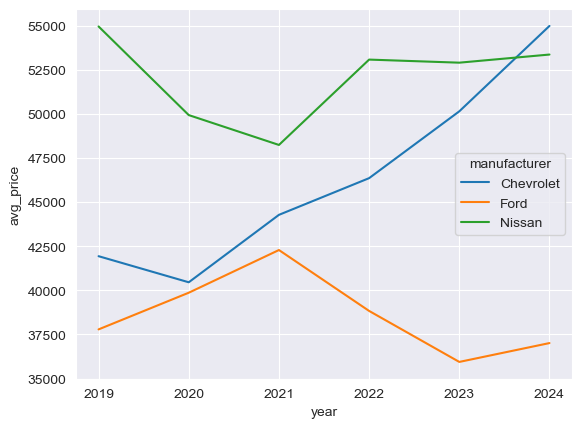

In [1232]:
sns.lineplot(new_df, x="year", y="avg_price", hue="manufacturer")

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='emission_value'>

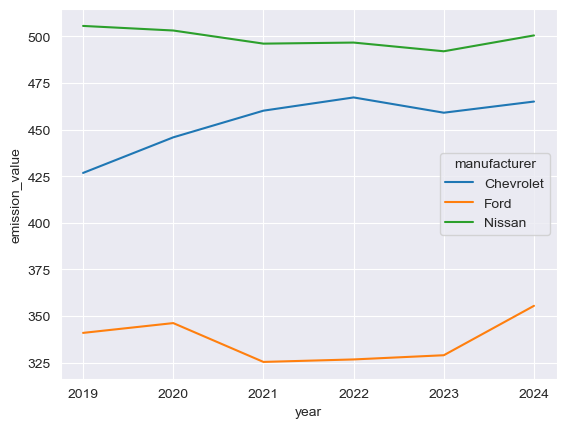

In [1225]:
sns.lineplot(new_df, x="year", y="emission_value", hue="manufacturer")

In [1362]:
bar_plot = all_df.pivot_table(index=["year","manufacturer"], columns="car_type", values="model", aggfunc="size")
# bar_plot_melt = pd.melt(bar_plot.reset_index(), id_vars=["year","manufacturer"], value_vars=["Diesel","Electricity","Premium Gasoline","Regular Gasoline"])
bar_plot
# bar_plot.to_csv("last_plot.csv", index=True)

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


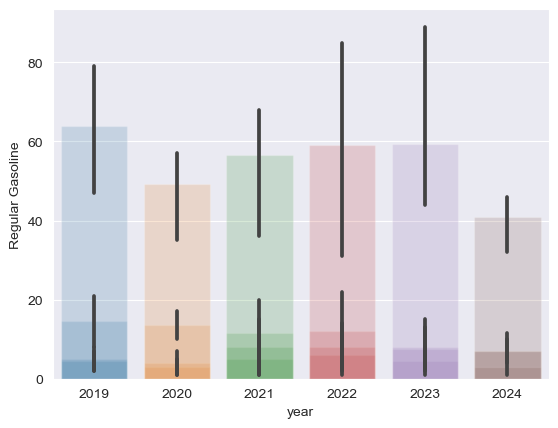

In [1360]:
fig = plt.subplot()

for f in bar_plot.keys():
    fig = sns.barplot(bar_plot, x=bar_plot.index.get_level_values("year"), y=f, alpha=.2, dodge=True)

In [ ]:
sns.barplot(bar_plot, x=bar_plot.index[0], y=bar_plot.columns, hue=bar_plot.index[1])